In [101]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('../../Data/incautacion_mercancia.csv')
df.head()

/tmp/ipykernel_4405/2734788378.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/linux/Escritorio/Darwin /Datathon/incautacion_mercancia.csv')


,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
0,2003-04-30T05:00:00.000-05:00,1.0,NaN,NaN,Sin dato,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Sin dato,SIJIN,Prendas ejercol,"Accesorios militares, policía o vigilancia pri...",Mercancía,Sin dato,Sin dato,Sin dato,Unidad,2024-10-06T04:05:35.000-05:00
1,2003-04-30T05:00:00.000-05:00,1.0,NaN,NaN,Sin dato,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Sin dato,SIJIN,Radio,Tecnología,Mercancía,Sin dato,Sin dato,Sin dato,Unidad,2024-10-06T04:05:35.000-05:00
2,2003-04-30T05:00:00.000-05:00,8.0,NaN,NaN,Sin dato,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Sin dato,SIJIN,Sin dato documentos,Documentos,Mercancía,Sin dato,Sin dato,Sin dato,Unidad,2024-10-06T04:05:35.000-05:00
3,2003-04-30T05:00:00.000-05:00,1.0,NaN,NaN,Sin dato,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Sin dato,SIJIN,Escopeta,Arma de fuego,Bélico,Sin dato,Sin dato,Sin dato,Unidad,2024-10-06T04:05:35.000-05:00
4,2003-04-30T05:00:00.000-05:00,1.0,NaN,NaN,Sin dato,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Sin dato,SIJIN,Pistola,Arma de fuego,Bélico,Sin dato,Sin dato,Sin dato,Unidad,2024-10-06T04:05:35.000-05:00


In [141]:
def theJson(df, col, variables, columnasdrop, bandera, name):
    # take the variables of the dataframe that we want
    df = df[df[col].isin(variables)].reset_index(drop=True)

    # take off the columns of the dataframe that we want, with the columnsdrop list
    dfnew = df.drop(columnasdrop, axis=1)
    dfnew.reset_index(drop=True, inplace=True)

    # make the values the column of districts are intergers
    dfnew['codigo_comuna'] = pd.to_numeric(df['codigo_comuna'], errors='coerce').fillna(0).astype('int64')
    
    # change the type of the column fecha_hecho to datetime
    dfnew['fecha_hecho'] = pd.to_datetime(dfnew['fecha_hecho']).dt.year
    dfnew['fecha_hecho'] = pd.to_datetime(dfnew['fecha_hecho'], format='%Y')
    dfnew = dfnew[["fecha_hecho","codigo_comuna"]].value_counts().reset_index().sort_values(by = 'codigo_comuna')
    dfnew.rename({0 : 'Total'}, axis=1, inplace=True)    

    # take de geojson file of the medellin districts
    geo_df = gpd.read_file("comunas_y_corregimientos.geojson")
    geo_df = geo_df.drop([19,21],axis = 0)
    geo_df = geo_df.astype({"codigo":"int64"})
    geo_df.rename({'codigo' : 'codigo_comuna'}, axis=1, inplace=True)

    total = geo_df.merge(dfnew, on='codigo_comuna')

    if bandera == 1:
        total.to_file(name, driver='GeoJSON')
    
    return total

In [142]:
col = 'bien'
columnasdrop = ['cantidad', 'latitud', 'longitud', 'sexo', 'edad',\
                'estado_civil', 'grupo_actor', 'actividad_delictiva', 'parentesco',\
                'ocupacion', 'discapacidad', 'grupo_especial', 'medio_transporte',
                'nivel_academico', 'testigo', 'conducta', 'modalidad',\
                'caracterizacion', 'conducta_especial', 'arma_medio', 'articulo_penal',\
                'categoria_penal', 'nombre_barrio', 'codigo_barrio',\
                'lugar', 'sede_receptora', 'categoria_bien', 'grupo_bien', 'bien',\
                'modelo', 'color', 'permiso', 'unidad_medida', 'fecha_ingestion']
variables = ['Marihuana', 'Cocaína', 'Lsd']
bandera = 0
name = 'incautacionMercancia.json'
total = theJson(df, col, variables, columnasdrop, bandera, name)

In [143]:
total

,OBJECTID,codigo_comuna,nombre,identificacion,limitemunicipioid,subtipo_comunacorregimiento,fecha_actualizacion,Shape_Length,Shape_Area,geometry,fecha_hecho,Total
0,1,1,Popular,Comuna 1,001,1,1418774400000,9604.447484,3.097941e+06,"POLYGON ((4718193.072 2255308.014, 4718182.769...",2023-01-01,140
1,1,1,Popular,Comuna 1,001,1,1418774400000,9604.447484,3.097941e+06,"POLYGON ((4718193.072 2255308.014, 4718182.769...",2017-01-01,246
2,1,1,Popular,Comuna 1,001,1,1418774400000,9604.447484,3.097941e+06,"POLYGON ((4718193.072 2255308.014, 4718182.769...",2022-01-01,480
3,1,1,Popular,Comuna 1,001,1,1418774400000,9604.447484,3.097941e+06,"POLYGON ((4718193.072 2255308.014, 4718182.769...",2010-01-01,253
4,1,1,Popular,Comuna 1,001,1,1418774400000,9604.447484,3.097941e+06,"POLYGON ((4718193.072 2255308.014, 4718182.769...",2012-01-01,287
...,...,...,...,...,...,...,...,...,...,...,...,...
420,23,15,Guayabal,Comuna 15,001,1,1418774400000,13279.241953,7.288421e+06,"POLYGON ((4713505.791 2243146.678, 4713505.99 ...",2011-01-01,484
421,23,15,Guayabal,Comuna 15,001,1,1418774400000,13279.241953,7.288421e+06,"POLYGON ((4713505.791 2243146.678, 4713505.99 ...",2017-01-01,361
422,23,15,Guayabal,Comuna 15,001,1,1418774400000,13279.241953,7.288421e+06,"POLYGON ((4713505.791 2243146.678, 4713505.99 ...",2006-01-01,508
423,23,15,Guayabal,Comuna 15,001,1,1418774400000,13279.241953,7.288421e+06,"POLYGON ((4713505.791 2243146.678, 4713505.99 ...",2022-01-01,528


In [118]:
df = df[df['bien'].isin(['Marihuana', 'Cocaína', 'Lsd'])].reset_index(drop=True)

In [119]:
columnasdrop = ['cantidad', 'latitud', 'longitud', 'sexo', 'edad',\
                'estado_civil', 'grupo_actor', 'actividad_delictiva', 'parentesco',\
                'ocupacion', 'discapacidad', 'grupo_especial', 'medio_transporte',
                'nivel_academico', 'testigo', 'conducta', 'modalidad',\
                'caracterizacion', 'conducta_especial', 'arma_medio', 'articulo_penal',\
                'categoria_penal', 'nombre_barrio', 'codigo_barrio',\
                'lugar', 'sede_receptora', 'categoria_bien', 'grupo_bien', 'bien',\
                'modelo', 'color', 'permiso', 'unidad_medida', 'fecha_ingestion']

dfnew = df.drop(columnasdrop, axis=1)
dfnew.reset_index(drop=True, inplace=True)

In [120]:
dfnew['codigo_comuna'] = pd.to_numeric(df['codigo_comuna'], errors='coerce').fillna(0).astype('int64')

In [121]:
dfnew['codigo_comuna'].unique()

array([ 0,  9,  1,  2,  4, 10, 14,  5, 15, 16, 11,  6,  3, 12,  7,  8, 13,
       60, 80, 90, 70, 50])

In [122]:
dfnew['fecha_hecho'] = pd.to_datetime(dfnew['fecha_hecho']).dt.year
dfnew['fecha_hecho'] = pd.to_datetime(dfnew['fecha_hecho'], format='%Y')
dfnew = dfnew[["fecha_hecho","codigo_comuna"]].value_counts().reset_index().sort_values(by = 'codigo_comuna')
dfnew.rename({0 : 'Total'}, axis=1, inplace=True)

In [139]:
dfnew.head()

,fecha_hecho,codigo_comuna,Total
437,2017-01-01,0,1
342,2009-01-01,0,39
99,2005-01-01,0,309
348,2011-01-01,0,35
285,2010-01-01,0,90


In [123]:
import geopandas as gpd
geo_df = gpd.read_file("comunas_y_corregimientos.geojson")
geo_df = geo_df.drop([19,21],axis = 0)
geo_df = geo_df.astype({"codigo":"int64"})
geo_df.rename({'codigo' : 'codigo_comuna'}, axis=1, inplace=True)

In [125]:
geo_df.head()

,OBJECTID,codigo_comuna,nombre,identificacion,limitemunicipioid,subtipo_comunacorregimiento,fecha_actualizacion,Shape_Length,Shape_Area,geometry
0,1,1,Popular,Comuna 1,001,1,1418774400000,9604.447484,3.097941e+06,"POLYGON ((4718193.072 2255308.014, 4718182.769..."
1,2,2,Santa Cruz,Comuna 2,001,1,1418774400000,8597.293651,2.195663e+06,"POLYGON ((4717199.364 2255945.395, 4717195.762..."
2,3,3,Manrique,Comuna 3,001,1,1418774400000,12077.558708,5.096182e+06,"POLYGON ((4718792.583 2253310.702, 4718790.16 ..."
3,4,4,Aranjuez,Comuna 4,001,1,1418774400000,9642.676522,4.883314e+06,"POLYGON ((4716607.297 2253867.449, 4716607.168..."
4,5,5,Castilla,Comuna 5,001,1,1418774400000,16098.031666,6.063916e+06,"POLYGON ((4716246.187 2256230.621, 4716238.195..."


In [126]:
c = geo_df.merge(dfnew, on='codigo_comuna')

In [10]:
df['codigo_comuna'] = df['codigo_comuna'].replace('SIN DATO', np.nan)
df.dropna(subset='codigo_comuna',inplace=True)

In [27]:
df['fecha_hecho'].unique()

array([2003, 2005, 2004, 2006, 2007, 2009, 2008, 2018, 2010, 2011, 2012,
       2013, 2014, 2015, 2017, 2016, 2022, 2023, 2019, 2020, 2021])

In [11]:
df.columns

Index(['fecha_hecho', 'cantidad', 'latitud', 'longitud', 'sexo', 'edad',
       'estado_civil', 'grupo_actor', 'actividad_delictiva', 'parentesco',
       'ocupacion', 'discapacidad', 'grupo_especial', 'medio_transporte',
       'nivel_academico', 'testigo', 'conducta', 'modalidad',
       'caracterizacion', 'conducta_especial', 'arma_medio', 'articulo_penal',
       'categoria_penal', 'nombre_barrio', 'codigo_barrio', 'codigo_comuna',
       'lugar', 'sede_receptora', 'bien', 'categoria_bien', 'grupo_bien',
       'modelo', 'color', 'permiso', 'unidad_medida', 'fecha_ingestion'],
      dtype='object')

In [24]:
df[df['bien'] == 'Lanza granadas']

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
2494,2003,24.0,NaN,NaN,Sin dato,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Sin dato,Grupo de operaciones especiales -GOES-,Lanza granadas,Arma de fuego,Bélico,Sin dato,Sin dato,Sin dato,Unidad,2024-10-06T04:05:35.000-05:00
27407,2004,1.0,6.246360,-75.571385,Sin dato,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Sin dato,Candelaria,Lanza granadas,Arma de fuego,Bélico,Sin dato,Sin dato,Sin dato,Unidad,2024-10-06T04:05:35.000-05:00
33242,2004,1.0,NaN,NaN,Sin dato,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Sin dato,Aranjuez,Lanza granadas,Arma de fuego,Bélico,Sin dato,Sin dato,Sin dato,Unidad,2024-10-06T04:05:35.000-05:00
231032,2012,1.0,6.277064,-75.572592,Sin dato,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Sin dato,Terminal del norte,Lanza granadas,Arma de fuego,Bélico,Sin dato,Sin dato,Sin dato,Unidad,2024-10-06T04:05:35.000-05:00
252454,2018,1.0,6.227546,-75.620082,Sin dato,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Sin dato,Belén,Lanza granadas,Arma de fuego,Bélico,Sin dato,Sin dato,Sin dato,Unidad,2024-10-06T04:05:35.000-05:00
402815,2019,1.0,6.206193,-75.605185,Sin dato,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Sin dato,Belén,Lanza granadas,Arma de fuego,Bélico,Sin dato,Sin dato,Sin dato,Unidad,2024-10-06T04:05:35.000-05:00


In [20]:
df['bien'].unique()

array(['Prendas ejercol', 'Radio', 'Sin dato documentos', 'Escopeta',
       'Pistola', 'Revólver', 'Beeper', 'Peso', 'Juego pirotécnico',
       'Marihuana', 'Arma blanca', 'Basuco', 'Celular', 'Automóvil',
       'Moto', 'Ave de jaula o pequeña', 'Reptiles', 'Pólvora negra',
       'Base de cocaína', 'Pastillas alucinógenas roche', 'Metralla',
       'Pastillas alucinógenas rovinool', 'Bicicleta', 'Moneda falsa',
       'Camión', 'Gasolina', 'Granada', 'Llave', 'Volqueta',
       'Sin dato licor adulterado', 'Sin dato electrodomésticos',
       'Repuestos para maquinaria y equipo', 'Sin dato mercancías',
       'Calibre munición', 'Campero', 'Cd', 'Aguardiente', 'Superanfor',
       'Carabina', 'Proveedores', 'Sin dato munición', 'Sin dato joyas',
       'Carne', 'Máquina', 'Prendas ponal', 'Estopines', 'Camioneta',
       'Otros animales', 'Ametralladora', 'Dinamita',
       'Artículos de aseo personal', 'Fusil',
       'Electrodoméstico video y audio y accesorios', 'Medicamentos',


In [12]:
df['fecha_hecho'] = pd.to_datetime(df['fecha_hecho']).dt.year

In [ ]:
# esto es el total de capturas por columna a lo largo de 2003 a 2023
df = df.astype({'codigo_comuna': int})
incmerc_comuna = [len(df[df['codigo_comuna'] == i]) for i in df['codigo_comuna'].unique()]
incmerc_comuna[:10], df['codigo_comuna'].unique()[:10]

([14258, 18863, 25009, 99891, 17452, 33916, 27522, 23937, 10149, 30615],
 array([ 9,  2,  1, 10,  8,  4,  5, 14, 12, 15]))

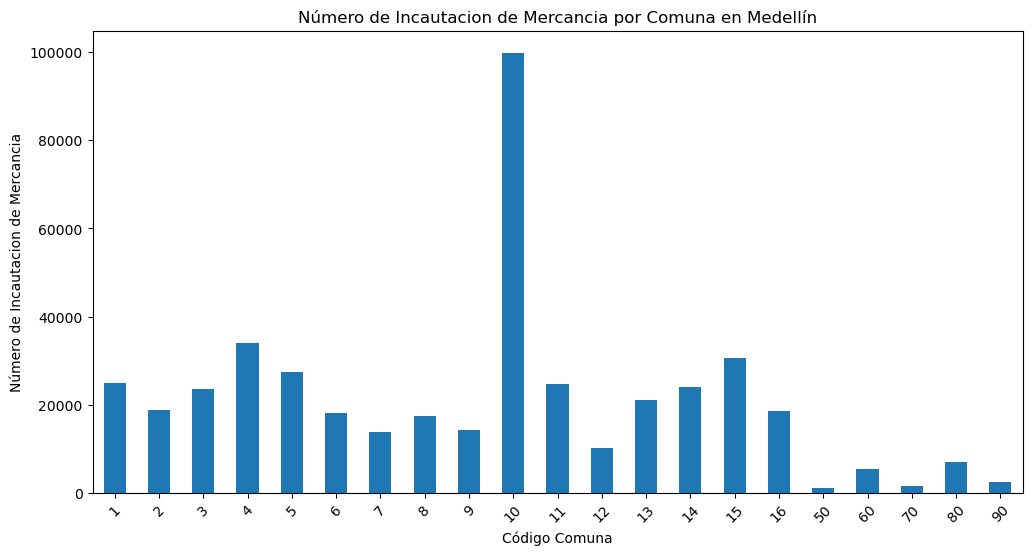

In [ ]:
# Create a histogram showing the number of captures for each comuna
# Group by 'codigo_comuna' and count the occurrences
comuna_counts = df['codigo_comuna'].value_counts().sort_index()

# Plotting the histogram
plt.figure(figsize=(12, 6))
comuna_counts.plot(kind='bar')
plt.xlabel("Código Comuna")
plt.ylabel("Número de Incautacion de Mercancia")
plt.title("Número de Incautacion de Mercancia por Comuna en Medellín")
plt.xticks(rotation=45)
plt.show()


In [ ]:
def incmerc_ano(df, i):
    """
    generar un histograma que muestre el número de homicidios por año para una comuna específica
    """
    # Filter data for comuna 6
    comuna = df[df['codigo_comuna'] == i]

    # Convert 'fecha_hecho' column to datetime format for proper time series analysis

    # Extract year from the 'fecha_hecho' column and count captures by year
    comuna['year'] = df['fecha_hecho']
    incmerc_year = comuna['year'].value_counts().sort_index()

    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    incmerc_year.plot(kind='bar')
    plt.xlabel("Año")
    plt.ylabel("Número de incautacion a mercancia")
    plt.title(f"Número de incautacion a mercancia por Año en la Comuna {i}")
    plt.xticks(rotation=45)
    plt.show()


/tmp/ipykernel_13609/2220975163.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comuna['year'] = df['fecha_hecho']


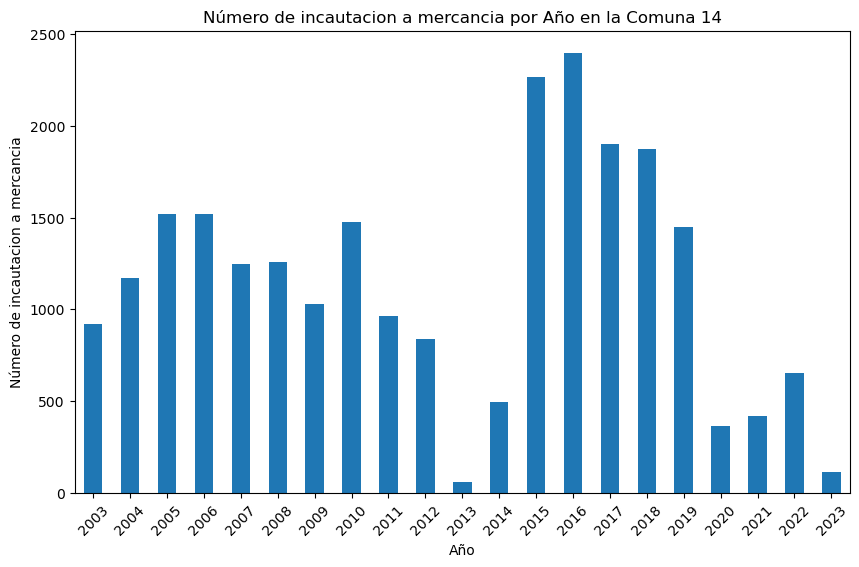

In [ ]:
incmerc_ano(df, 14)